In [86]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

   Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5    TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
5   6    TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  12950         32   
6   7  TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  16900         27   
7   8  TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8   9    TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
9  10    TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors  12950         23   

   Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Powered_Windows  \
0         10      2002  46986    Diesel   90          1  ...               1   
1         10      2002  7

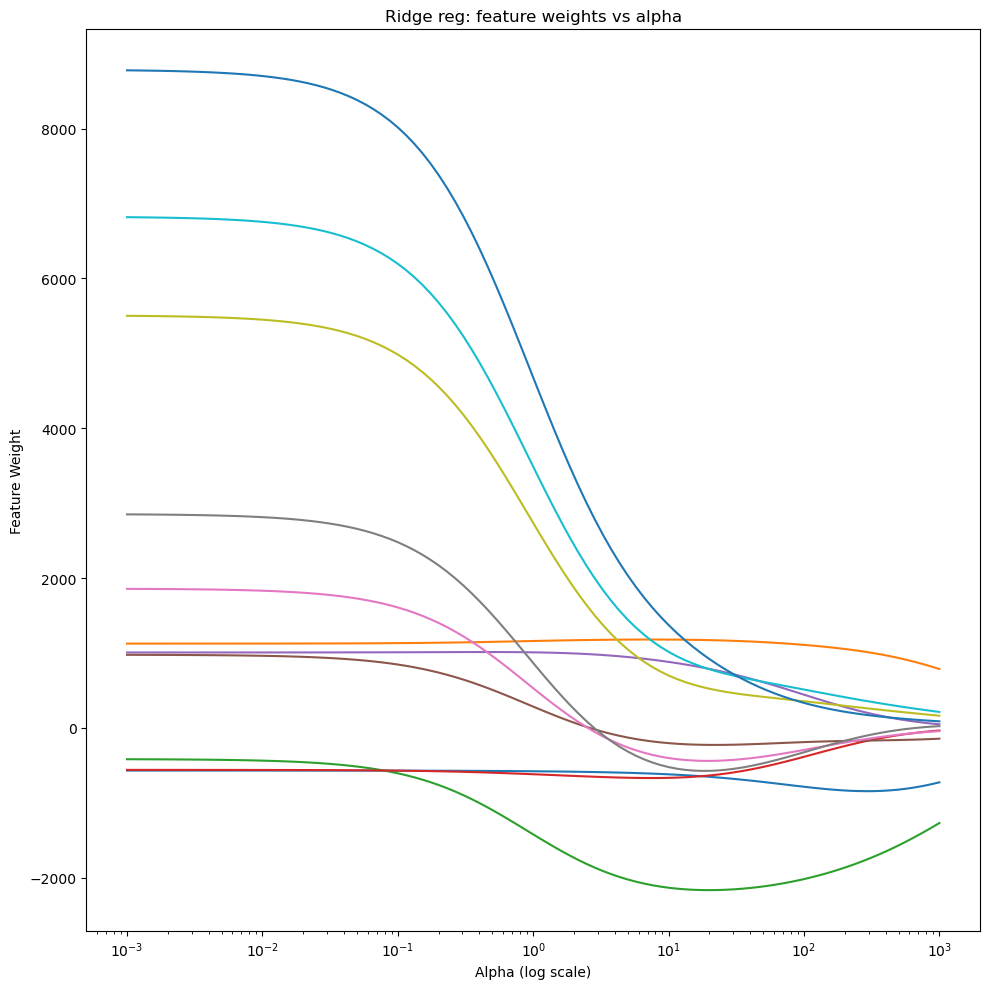

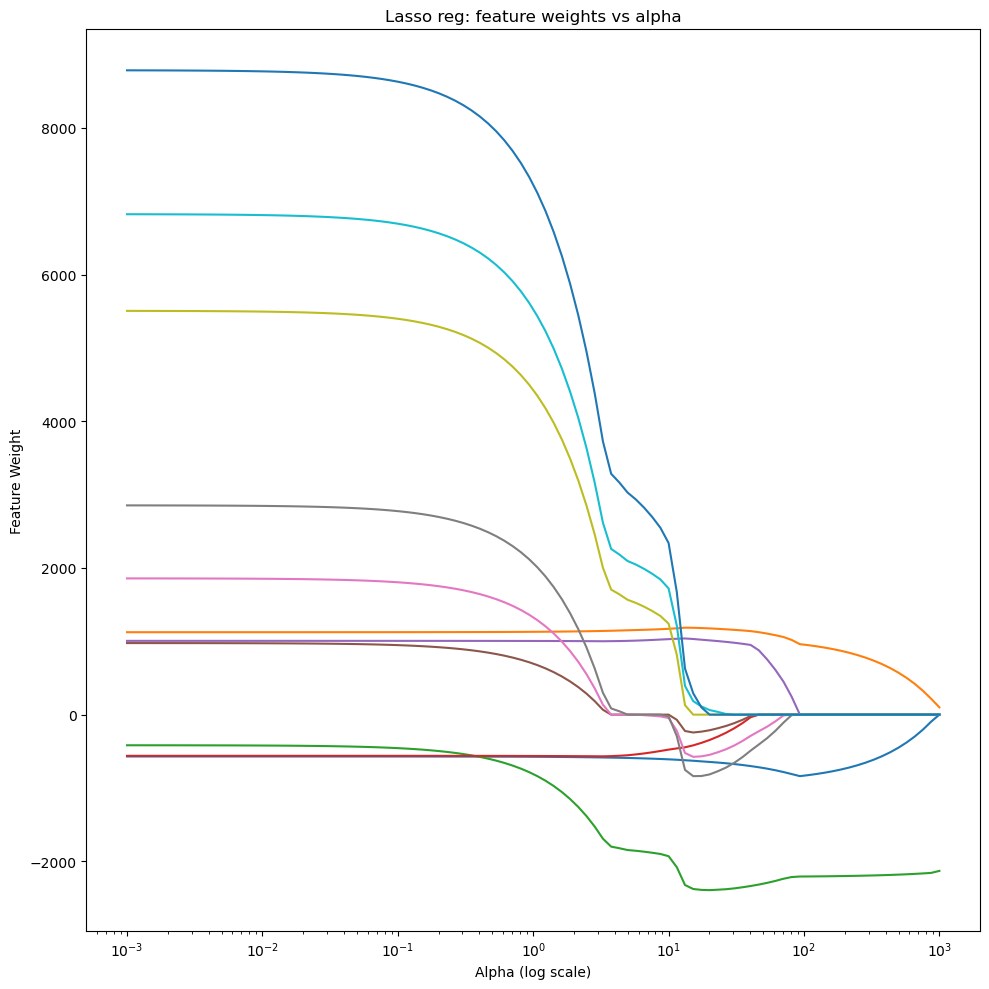

KM                    -0.000000
Weight                99.775208
Age_08_04          -2130.609336
Fuel_Type_Diesel      -0.000000
Fuel_Type_Petrol       0.000000
Mfg_Year_1999         -0.000000
Mfg_Year_2000         -0.000000
Mfg_Year_2001         -0.000000
Mfg_Year_2002          0.000000
Mfg_Year_2003          0.000000
Mfg_Year_2004          0.000000
Name: 99, dtype: float64


/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2350108.58264935, tolerance: 1213421.0261887785
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3554698.4717105627, tolerance: 1213421.0261887785
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3898689.9181643724, tolerance: 1213421.0261887785
  model = cd_fast.sparse_enet_coordinate_descent(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/l

10000.000000    1.315242e+07
8302.175681     1.315242e+07
6892.612104     1.315242e+07
5722.367659     1.315242e+07
4750.810162     1.315242e+07
                    ...     
0.000210        1.220530e+06
0.000175        1.220540e+06
0.000145        1.220548e+06
0.000120        1.220554e+06
0.000100        1.220560e+06
Length: 100, dtype: float64
0.07468624798894113
0.07468624798894113


In [70]:
%run '../Tutorial 3/3.1.ipynb'



## 4.1

In [94]:
# train test split has to be performed again

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True,random_state=42, test_size=0.2)


In [72]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators= 500))
])

rf_pipeline.fit(X_train, y_train)

test_score = rf_pipeline.score(X_test, y_test)
print(f"Random Forest Test Score (R^2): {test_score:.4f}")

tree_depths = [tree.tree_.max_depth for tree in rf_pipeline.named_steps['rf'].estimators_]
print(f"Depth of each tree in the forest: {tree_depths}")
print(f"Average depth of trees: {sum(tree_depths) / len(tree_depths):.2f}")



Random Forest Test Score (R^2): 0.9293
Depth of each tree in the forest: [24, 22, 27, 21, 23, 22, 22, 22, 21, 22, 22, 19, 22, 23, 21, 28, 25, 24, 21, 21, 26, 27, 21, 27, 23, 24, 22, 25, 21, 21, 21, 22, 25, 23, 22, 23, 20, 20, 25, 22, 22, 21, 24, 22, 21, 21, 22, 24, 22, 21, 24, 25, 21, 24, 21, 22, 20, 24, 22, 26, 19, 24, 20, 23, 21, 24, 22, 25, 24, 22, 23, 20, 24, 22, 23, 19, 22, 25, 24, 24, 22, 21, 27, 24, 24, 22, 25, 19, 20, 22, 23, 20, 22, 24, 21, 20, 24, 22, 20, 26, 22, 24, 20, 21, 23, 22, 21, 21, 24, 21, 21, 27, 21, 20, 20, 22, 21, 24, 19, 23, 22, 20, 25, 21, 23, 23, 24, 23, 24, 23, 26, 21, 22, 21, 27, 24, 22, 22, 21, 22, 25, 23, 21, 24, 22, 23, 23, 24, 19, 24, 24, 22, 24, 24, 22, 23, 21, 19, 25, 21, 25, 19, 24, 23, 27, 20, 26, 21, 23, 20, 24, 22, 20, 21, 21, 23, 20, 23, 21, 22, 27, 25, 25, 23, 23, 20, 24, 20, 23, 21, 23, 22, 26, 20, 20, 21, 21, 25, 20, 23, 23, 27, 26, 24, 23, 20, 25, 20, 23, 25, 22, 24, 21, 21, 27, 23, 24, 27, 23, 21, 22, 20, 21, 20, 21, 25, 22, 21, 22, 22, 22, 23

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


The depth of trees in a random forest is determined by the max_depth parameter. If not set, the trees will keep growing until all leaves are pure or contain less than min_samples_split samples. By default, the number of features per split is all.

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.07804192496104587


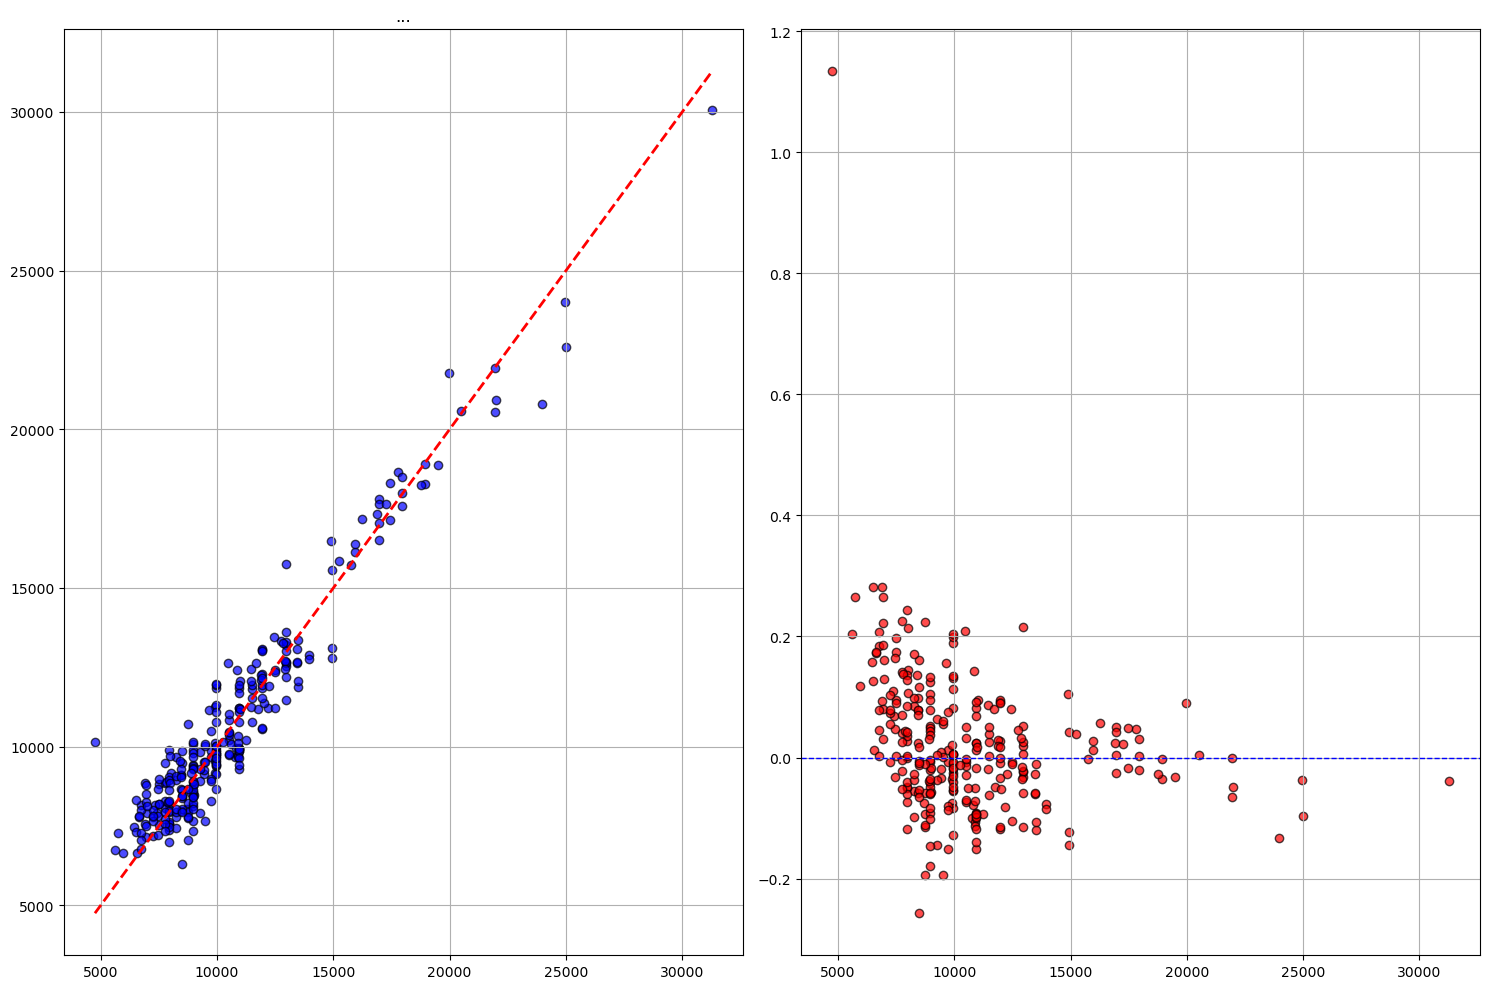

In [73]:
preds_rf = rf_pipeline.predict(X_test)
mape_rf = mean_absolute_percentage_error(y_test, preds_rf)
print(mape_rf)

relative_error_rf = (preds_rf - y_test) / y_test

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw = 2,label = 'Perfect prediction')
ax[0].scatter(y_test, preds_rf, alpha=0.7, color = 'b', edgecolor= 'black')
ax[0].set_title('...')
ax[0].grid(True)

ax[1].scatter(y_test, relative_error_rf, alpha = 0.7, color='r', edgecolor='black')
ax[1].axhline(y=0, color = 'b', linestyle = '--', lw = 1)
ax[1].grid(True)

plt.tight_layout()
plt.show()

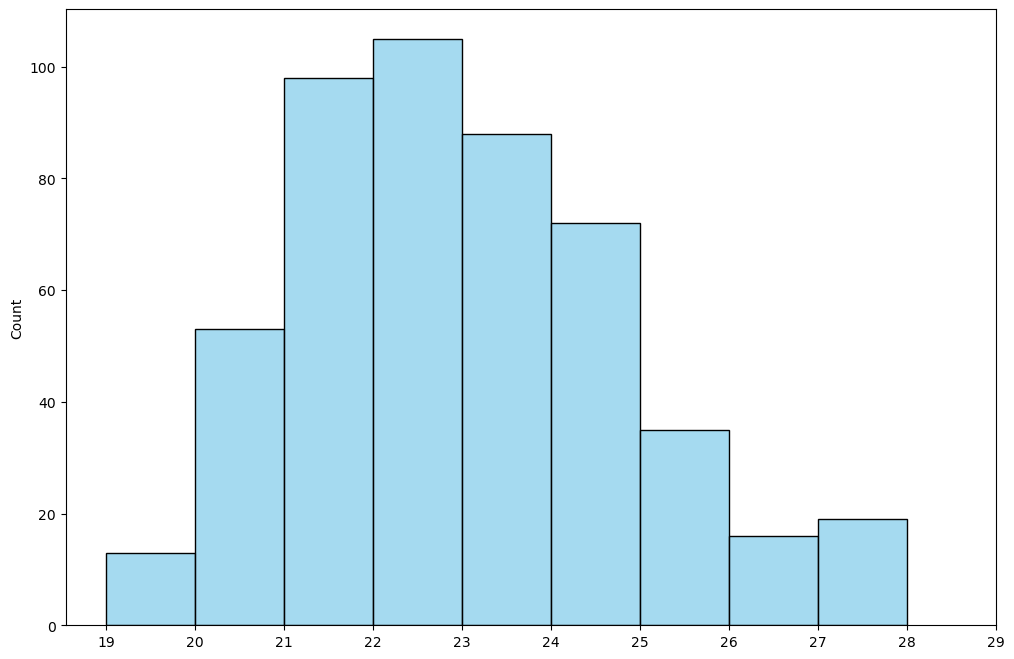

In [74]:


plt.figure(figsize=(12,8))
sns.histplot(tree_depths, color='skyblue',edgecolor='black', bins = np.arange(min(tree_depths), max(tree_depths)))
plt.xticks(ticks=np.arange(min(tree_depths),max(tree_depths)+1,1))
plt.show()


['Age_08_04' 'KM' 'Weight' 'Mfg_Month_2' 'Mfg_Month_3' 'Mfg_Month_4'
 'Mfg_Month_5' 'Mfg_Month_6' 'Mfg_Month_7' 'Mfg_Month_8' 'Mfg_Month_9'
 'Mfg_Month_10' 'Mfg_Month_11' 'Mfg_Month_12' 'Mfg_Year_1999'
 'Mfg_Year_2000' 'Mfg_Year_2001' 'Mfg_Year_2002' 'Mfg_Year_2003'
 'Mfg_Year_2004' 'Fuel_Type_Diesel' 'Fuel_Type_Petrol' 'HP_71' 'HP_72'
 'HP_73' 'HP_86' 'HP_90' 'HP_97' 'HP_98' 'HP_107' 'HP_110' 'HP_116'
 'HP_192' 'Met_Color_1' 'Color_Black' 'Color_Blue' 'Color_Green'
 'Color_Grey' 'Color_Red' 'Color_Silver' 'Color_Violet' 'Color_White'
 'Color_Yellow' 'Automatic_1' 'CC_1332' 'CC_1398' 'CC_1400' 'CC_1587'
 'CC_1598' 'CC_1600' 'CC_1800' 'CC_1900' 'CC_1975' 'CC_1995' 'CC_2000'
 'CC_16000' 'Doors_3' 'Doors_4' 'Doors_5' 'Gears_4' 'Gears_5' 'Gears_6'
 'Quarterly_Tax_40' 'Quarterly_Tax_64' 'Quarterly_Tax_69'
 'Quarterly_Tax_72' 'Quarterly_Tax_85' 'Quarterly_Tax_100'
 'Quarterly_Tax_185' 'Quarterly_Tax_197' 'Quarterly_Tax_210'
 'Quarterly_Tax_234' 'Quarterly_Tax_283' 'Mfr_Guarantee_1'
 'BOVAG_G

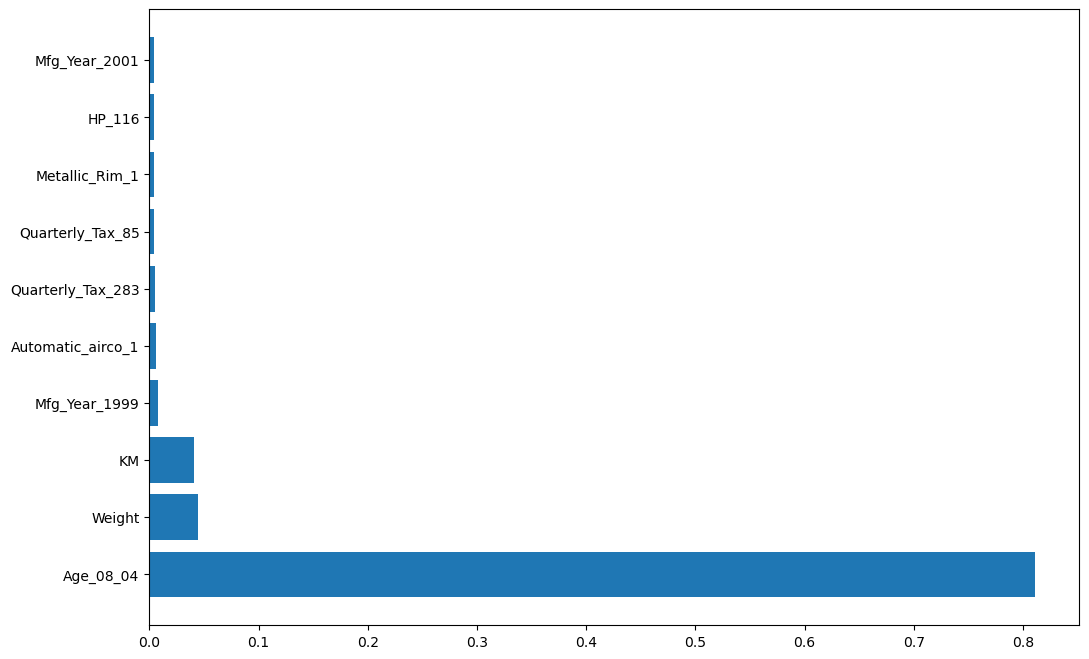

In [79]:
numerical_features = preprocessor.transformers_[0][1].get_feature_names_out()
oneHotEncoded_features = preprocessor.transformers_[1][1].get_feature_names_out()

all_feature_names = np.concatenate([numerical_features, oneHotEncoded_features])
print(all_feature_names)

feature_importances = rf_pipeline.named_steps['rf'].feature_importances_
feature_importances_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending = False)
feature_importances_df = feature_importances_df.iloc[:10,:]
plt.figure(figsize=(12,8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.show()

In [106]:
# 4.1 Build our own cross validation for random forest

class RandomForestCV():
    def __init__(self, n_estimators, max_depth = None, n_splits = 5, random_state = 42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.n_splits = n_splits
        self.random_state = random_state
        self.models = []
        self.cv_error = 0
        self.best_model = None

    def _split_data(self, X, y):
        assert X.shape[0] == y.shape[0], 'X and y have an unequal nr of observations'
        n_samples = X.shape[0]
        indices = np.arange(n_samples)
        np.random.shuffle(indices)

        fold_size = n_samples // self.n_splits
        folds = []

        for i in range(self.n_splits):
            val_indices = indices[i * fold_size:(i + 1) * fold_size]
            train_indices = np.setdiff1d(indices, val_indices)
            folds.append((train_indices, val_indices))

        return folds
    
    def fit(self, X, y):
        folds = self._split_data(X, y)
        fold_errors = []
        X = X.toarray()
        for fold, (train_idx, val_idx) in enumerate(folds):
            X_train, X_val = X[train_idx,:], X[val_idx,:]
            y_train, y_val = y.to_numpy()[train_idx], y.to_numpy()[val_idx]

            model = RandomForestRegressor(n_estimators= self.n_estimators, max_depth=self.max_depth, random_state= self.random_state)
            model.fit(X_train, y_train)
            self.models.append(model)

            y_pred = model.predict(X_val)
            error = mean_absolute_error(y_val, y_pred)
            fold_errors.append(error)

        self.cv_error = np.mean(fold_errors)
        self.best_model = self.models[fold_errors.index(min(fold_errors))]

    def predict(self, X):
        if self.best_model is None:
            raise ValueError("Model not fitted, call 'fit' before 'predict'")
        
        return self.best_model.predict(X)
        
    


In [107]:
pipeline_rf_CV_custom = Pipeline([
    ('preprocessor', preprocessor),
    ('rf_CV_custom', RandomForestCV(n_estimators=500))
])

pipeline_rf_CV_custom.fit(X_train, y_train)
print(pipeline_rf_CV_custom.named_steps['rf_CV_custom'].cv_error)

preds_rf_CV = pipeline_rf_CV_custom.predict(X_test)
MAE_rf_CV = mean_absolute_error(y_test, preds_rf_CV)
print(MAE_rf_CV)

797.8564471615721
779.1246527777778


/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [11, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# 3.1 Now compare with sklearn builtin function

